In [1]:
# show result from all calculations of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Bayesian Inference

This notebook follows very closely the series of posts Frequentism and Bayesianism: A Practical Introduction in http://jakevdp.github.io/blog/2014/06/06/frequentism-and-bayesianism-2-when-results-differ/. Is ts also in arXiv:1411.5018

## Frequentism vs. Bayesianism

From a **Frequentist’s perspective**, probabilities represent long term frequencies with which events occur.

For **Bayesians**, the concept of probability is extended to cover degrees of certainty about statements, or **belief**.

This is not **just philosofy**, it has important consequences in the way one approach the problem, the tecniques involved and sometimes, the very answer.

## The simplest Example already contains enough

Ler observing a light coming from a single star with constant flux over time. So, that is a fixed value $F_{\rm true}$ and we perform a series of measurements $N$, and we have $F_i$ measurements with error $e_i$ 

Given the set of measurements $D = \{F_i, e_i\}$, the question a scientist make is: What is out best estimate of the true flux $F_{\rm true}$?

We will model this situation in Python, since the measurement are number counts the appropriate distribution is a Poisson Distribution.

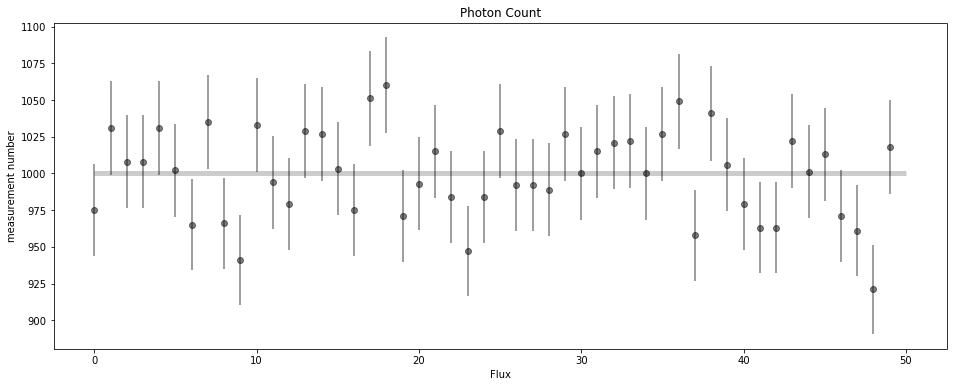

In [2]:
# Generating photon count
import numpy  as np 
import matplotlib.pyplot as plt
from scipy import stats 
%matplotlib inline

F_true = 1000
N = 50
# rvs function draws N random values from Poisson Dist.
F = stats.poisson(F_true).rvs(N)
e = np.sqrt(F)

fig = plt.figure(figsize = (16,6))
plt.errorbar(np.arange(N), F, yerr = e, fmt="ok", alpha = 0.5)
plt.hlines([F_true], 0, N, linewidth=5, alpha=0.2)
plt.xlabel("Flux")
plt.ylabel("measurement number")
plt.title("Photon Count")
plt.show();

### Frequentist Approach

The frequentist aproach is called the **maximum likelihood** approach. Given a single observation $D_i = (F_i, e_i)$, we can compute the probability distribution of the measurement given the true flux $F_{\rm true}$ given our assumption of Gaussian errors. The propability of $D_i$ given $F_{\rm true}$ is given by:

$$ P(D_i~|~F_{\rm true}) = \frac{1}{\sqrt{2\pi e_i^2}} \exp{\left[\frac{-(F_i - F_{\rm true})^2}{2 e_i^2}\right]} $$


The **likelihood function** is obtained considering all the observed data. In the case in which all the observations are independent from another we just compute the product of the probabilities for each data point:

$$\mathcal{L}(D~|~F_{\rm true}) = \prod_{i=1}^N P(D_i~|~F_{\rm true})$$

It is computationally convenient to consider the **log-likelyhood**, based on the fact that the log is monotonic.


$$\log\mathcal{L} = -\frac{1}{2} \sum_{i=1}^N \left[ \log(2\pi  e_i^2) + \frac{(F_i - F_{\rm true})^2}{e_i^2} \right]$$

We want $F_{\rm true}$ such that the likelihood is maximized. For this simple problem, the maximization can be computed analytically (i.e. by setting $d\log\mathcal{L}/dF_{\rm true} = 0$). This results in the following:

$$ F_{\rm est} = \frac{\sum w_i F_i}{\sum w_i};~~w_i = 1/e_i^2 $$

$F_{\rm est}$ is simply the mean of the observed data when errors are equal.

We can go further and ask what the error of our estimate is. In the frequentist approach, this can be accomplished by fitting a Gaussian approximation to the likelihood curve at maximum; in this simple case this can also be solved analytically. It can be shown that the standard deviation of this Gaussian approximation is:

$$ \sigma_{\rm est} = \left(\sum_{i=1}^N w_i \right)^{-1/2} $$



In [3]:
w = 1. / e ** 2
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, (w * F).sum() / w.sum(), w.sum() ** -0.5, N))


      F_true = 1000
      F_est  = 999 +/- 4 (based on 50 measurements)
      


That is what some of the native pythonics fitting algoriths do.

In [4]:
from scipy.optimize import curve_fit
def F_fit(t, a, b):
    return a*t + b
t = np.arange(N)

popt, pcov = curve_fit(F_fit, t, F, sigma=e)
perr = np.sqrt(np.diag(pcov))
#print fit parameters and 1-sigma estimates
print("fit parameter 1-sigma error")
print("———————————–")
for i in range(len(popt)):
    print(str(popt[i])+" +- "+str(perr[i]))

fit parameter 1-sigma error
———————————–
-0.30013502016013405 +- 0.3026359893516052
1006.1721708165263 +- 8.627046733913335


### Bayesian Approach

In the Bayesian approach we want to compute our **knowledge of the parameters** in question. The probability that $F_\rm{true}$ represent the real photon count given our knowledge D:

$$ P(F_{\rm true}~|~D) $$
 
Note that in the frquentist approach one cannot even talk about the true value. 

To compute this result, we need Bayes theorem as our central piece, which is a triviality for ordinary probabilities, but it is its interpretation that gives power to bayesian formalism:

$$ P(F_{\rm true}~|~D) = \frac{P(D~|~F_{\rm true})~P(F_{\rm true})}{P(D)} $$
 
Each piece of the above expression has some meaning:

- $P(F_{\rm true}~|~D)$: The **posterior**, or the probability of the model parameters given the data: this is the result we want to compute.
- $P(D~|~F_{\rm true})$: The **likelihood**, which is proportional to the $\mathcal{L}(D~|~F_{\rm true})$ in the frequentist approach, above.
- $P(F_{\rm true})$: The **model prior**, which encodes what we knew about the model prior to the application of the data $D$.
- $P(D)$: The **evidence**, or **data probability**, which in practice amounts to simply a normalization term.

If we set the prior $P(F_{\rm true}) \propto 1$ (a *flat prior*), we find

$$P(F_{\rm true}|D) \propto \mathcal{L}(D|F_{\rm true})$$

and the Bayesian probability is maximized at precisely the same value as the frequentist result! So despite the philosophical differences, we see that (for this simple problem at least) the Bayesian and frequentist point estimates are equivalent.

https://github.com/twiecki/WhileMyMCMCGentlySamples/blob/master/content/downloads/notebooks/MCMC-sampling-for-dummies.ipynb  
https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a

#### MonteCarlo from Scratch

We sample from the proposal, given priors, and calculate likelyhood. If likelyhood increases we incorporate the proposal, if not, we may or may not incorporate the proposal, by running a uniform distribution and comparing to the likelyhood ratio.

In [5]:
def log_prior(theta):
    return 1  # flat prior

def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                         + (F - theta) ** 2 / e ** 2)

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

def acceptance(x, x_new):
    if x_new > x:
        return True 
    else: 
        accept = np.random.uniform(0,1)
        # Log-likelyhood - we need to exponentiate to compare
        return (accept < np.exp(x_new-x))
    
def proposal(Fi, x0):
    return x0*np.random.rand()

def metropolis_hastings(likelihood,log_prior, proposal, param_init,iterations,data,acceptance_rule):
    # Complete Docstring
    x0 = param_init
    x = x0
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  proposal(x,x0)    
        x_lik = likelihood(x,data[0], data[1])
        x_new_lik = likelihood(x_new,data[0], data[1])
        accept = acceptance_rule(x_lik + log_prior(x), x_new_lik + log_prior(x_new))     
        if accept:            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            

    return np.array(accepted), np.array(rejected)    

In [6]:
accepted, rejected = metropolis_hastings(
    log_likelihood,
    log_prior,
    proposal,
    2000., 
    1000000,
    [F,e],
    acceptance
)

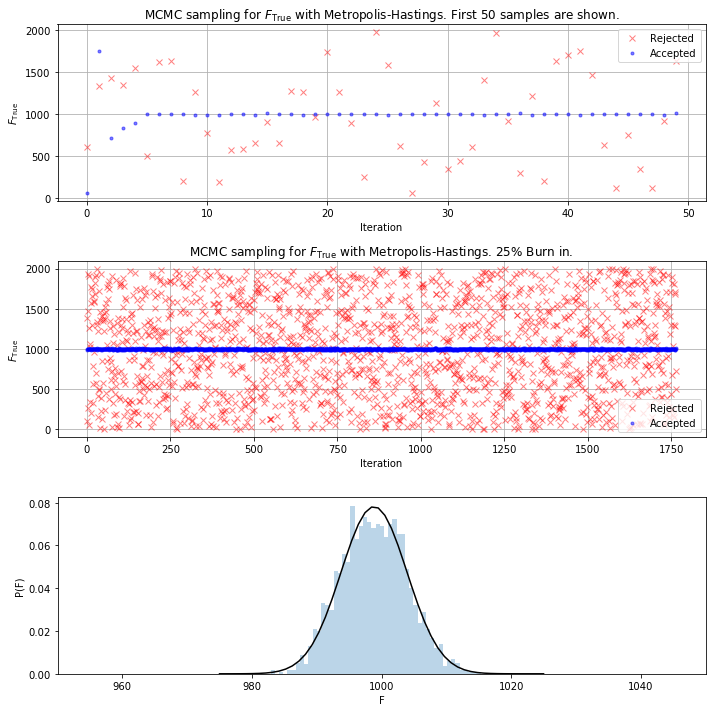

In [8]:
to_show=-int(0.25*accepted.shape[0])
# Fit a gaussian
F_fit = np.linspace(975, 1025)
pdf = stats.norm(np.mean(accepted[to_show:]), np.std(accepted[to_show:])).pdf(F_fit)

# Plot first samples
# Plot samples after 25% burn in
# Histogram and fitted gaussian

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(3,1,1)
ax.plot( rejected[0:50], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$F_\mathrm{True}$")
ax.set_title("MCMC sampling for $F_\mathrm{True}$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()

ax2 = fig.add_subplot(3,1,2)

ax2.plot( rejected[to_show:], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$F_\mathrm{True}$")
ax2.set_title("MCMC sampling for $F_\mathrm{True}$ with Metropolis-Hastings. 25% Burn in.")
ax2.grid()
ax2.legend()

ax3 = fig.add_subplot(3,1,3)
ax3.hist(accepted[to_show:], bins= 50, alpha=0.3, density=True)
ax3.plot(F_fit, pdf, '-k')
ax3.set_xlabel("F")
ax3.set_ylabel("P(F)")
ax3.set_xlim((950,1050))
fig.tight_layout();

In [9]:
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, np.mean(accepted), np.std(accepted), N))


      F_true = 1000
      F_est  = 999 +/- 16 (based on 50 measurements)
      


#### BlackBox MCMC


[**MCMC samplers**]:
  1. [emcee]
  2. [PyMC3]
  3. [Edward]
  4. [TensorFlow Probability]
  5. [PyMC4]
  6. [PyStan]
  7. [PyJAGS]

[**Nested samplers**]
  1. [Nestle]
  2. [CPNest]
  3. [dynesty]
  4. [UltraNest]
  5. [PyMultiNest]
  6. [DNest4]
  7. [PyPolyChord]

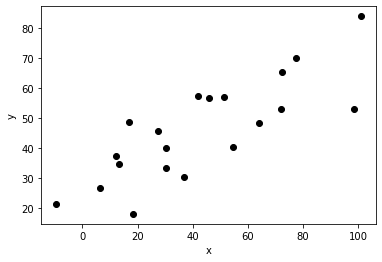

In [10]:
x0 = np.linspace(0, 100, 500)

# Create Data
np.random.seed(42)
theta_true = (25, 0.5)
xdata = 100 * np.random.random(20)
ydata = theta_true[0] + theta_true[1] * xdata

# add scatter to points
xdata = np.random.normal(xdata, 10)
ydata = np.random.normal(ydata, 10)
plt.plot(xdata, ydata, 'ok')
plt.xlabel('x')
plt.ylabel('y');

In [11]:
# Create some convenience routines for plotting
# These are difficult to understand but it's only a convoluted plot.

def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = np.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)

In [12]:
import emcee
print(emcee.__version__)

2.2.1


In [13]:
# Define our posterior using Python functions
# for clarity, I've separated-out the prior and likelihood
# but this is not necessary. Note that emcee requires log-posterior

def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma < 0:
        return -np.inf  # log(0)
    else:
        return -1.5 * np.log(1 + beta ** 2) - np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)

# Here we'll set up the computation. emcee combines multiple "walkers",
# each of which is its own MCMC chain. The number of trace results will
# be nwalkers * nsteps

ndim = 3  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

In [14]:
# Here's the function call where all the work happens:
# we'll time it using IPython's %time magic

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[xdata, ydata])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

CPU times: user 6.45 s, sys: 0 ns, total: 6.45 s
Wall time: 6.45 s


(array([[21.01061599,  0.65531302, 11.4725712 ],
        [22.87016599,  0.54389724,  8.2423457 ],
        [24.11742786,  0.49161118,  8.0921626 ],
        [28.65816467,  0.47741649,  8.78635559],
        [24.1266358 ,  0.49794368,  8.67033263],
        [31.64889402,  0.37208156,  9.86403665],
        [31.80068229,  0.38538338, 11.8589104 ],
        [28.91922914,  0.38710304, 12.07319711],
        [24.34368446,  0.4897879 ,  9.91762336],
        [26.38574671,  0.51456774, 10.50799766],
        [32.59084507,  0.36606168, 10.18417874],
        [38.61490391,  0.22618576, 11.01198979],
        [31.55181213,  0.42901184,  9.23693365],
        [29.18910944,  0.44341582, 10.02955193],
        [31.36887007,  0.38962625, 10.73198621],
        [28.75023703,  0.47746023,  8.87815735],
        [25.33961126,  0.47755188, 10.87858028],
        [27.67745711,  0.44419378,  9.2239617 ],
        [30.23314099,  0.38493136,  7.734614  ],
        [36.58736334,  0.36655511, 16.87358486],
        [29.88763386

done


In [15]:
# Have you installed corner?
try:
    import corner
except ImportError:
    import sys
    !{sys.executable} -m pip install corner

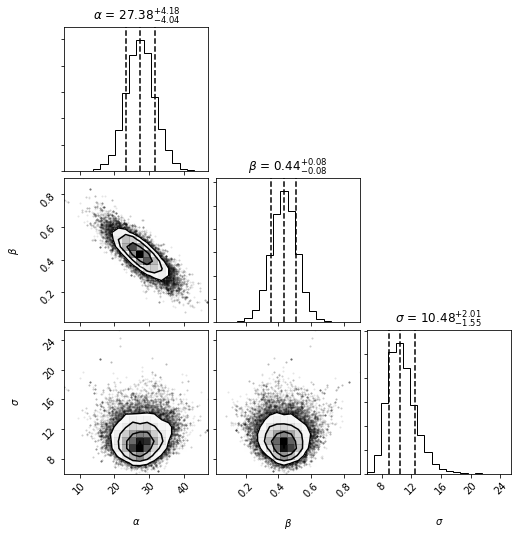

In [16]:
labels=[r'$\alpha$',r'$\beta$',r'$\sigma$']
flat_trace = sampler.chain[:, nburn:, :].reshape(-1,ndim)
fig = corner.corner(flat_trace, labels=labels,  quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

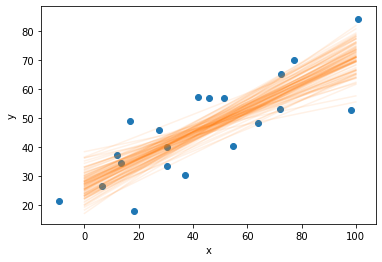

In [17]:
inds = np.random.randint(len(flat_trace), size=100)
for ind in inds:
    sample = flat_trace[ind]
    plt.plot(x0, sample[0] + x0*sample[1], "C1", alpha=0.1)
plt.scatter(xdata, ydata)
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y");


In [18]:
from getdist import plots, MCSamples
import getdist

Removed no burn in


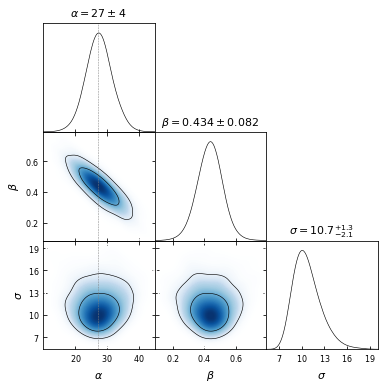

In [19]:
names = ["alpha", "beta", "sigma"]
labels =  ["α", "β", "σ"]
samples = MCSamples(samples=flat_trace, names = names, labels = labels)
# Triangle plot
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize = 14
g.triangle_plot(samples,
                shaded=True,
                title_limit=1, # first title limit (for 1D plots) is 68% by default
                markers={'alpha':27})



#### Pymc3

In [20]:
# Have you installed pymc3?
try:
    import pymc3
except ImportError:
    import sys
    !{sys.executable} -m pip install pymc3

In [21]:
import pymc3 as pm

In [40]:
# This is tricky. We need this object to construct prior custom density distribution
import theano.tensor as tt

with pm.Model():
    alpha = pm.Uniform('alpha', 10, 40)
    
    # Create custom densities
    # We are using the usual functions, but from the module tt.
    # This allows the prior to be calculated according to formula and updated
    # Density class has method random to populate value
    beta = pm.DensityDist('beta', lambda value: -1.5 * tt.log(1 + value**2), testval=0)
    sigma = pm.DensityDist('sigma', lambda value: -tt.log(tt.abs_(value)), testval=1)
    y_model = pm.Deterministic('y_model', alpha + beta * xdata)
    # Likelyhood
    y = pm.Normal('y', mu = alpha + beta*xdata, sd = sigma, observed = ydata)
    
    # Calculate the traces with default algorithm (NUTS)
    # using 4 cores of your processor
    traces = pm.sample(draws=50000, tune=2000, cores = 4)


Sampling 4 chains: 100%|██████████| 208000/208000 [02:13<00:00, 1557.64draws/s]


Removed no burn in


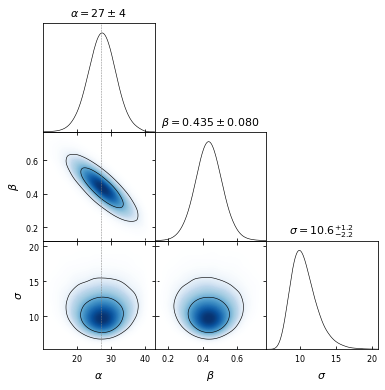

In [41]:
# extract the traces and plot the results
pymc_trace = np.asarray([traces['alpha'][:],
              traces['beta'][:],
              traces['sigma'][:]]).T
names = ["alpha", "beta", "sigma"]
labels =  ["α", "β", "σ"]
samples = MCSamples(samples=pymc_trace, names = names, labels = labels)
# Triangle plot
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize = 14
g.triangle_plot(samples,
                shaded=True,
                title_limit=1, # first title limit (for 1D plots) is 68% by default
                markers={'alpha':27})

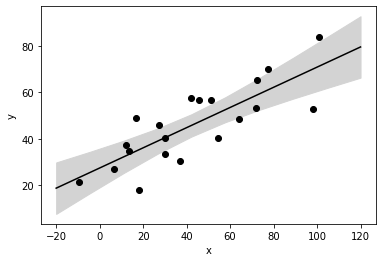

In [42]:
# extract the traces and plot the results
pymc_trace = [traces['alpha'][:],
              traces['beta'][:],
              traces['sigma'][:]]

fig, ax = plt.subplots()
ax.plot(xdata, ydata, 'ok')

alpha, beta = pymc_trace[:2]
xfit = np.linspace(-20, 120, 10)
yfit = alpha[:, None] + beta[:, None] * xfit
mu = yfit.mean(0)
sig = 2 * yfit.std(0)

ax.plot(xfit, mu, '-k')
ax.fill_between(xfit, mu - sig, mu + sig, color='lightgray')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show();

# Model Selection

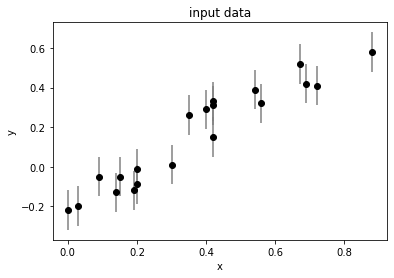

In [23]:
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, sigma_y = data

fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.set(xlabel='x', ylabel='y', title='input data');

## Should we fit a linear or a quadratic model?

In [24]:
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

In [25]:
def logL(theta, model=polynomial_fit, data=data):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(y, y_fit, sigma_y))          

In [26]:
from scipy import optimize

def best_theta(degree, model=polynomial_fit, data=data):
    # This creates a vector (0,0,...0) with degree+1 entryes
    theta_0 = (degree + 1) * [0]
    # This is the function to be minimizes expressed as a function of theta
    neg_logL = lambda theta: -logL(theta, model, data)
    # minimize
    return optimize.fmin(neg_logL, theta_0, disp=False)

theta1 = best_theta(1) # Linear
theta2 = best_theta(2) # Quadratic

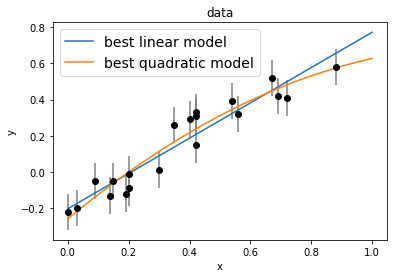

In [27]:
xfit = np.linspace(0, 1, 1000)
fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');

In [28]:
print("linear model:    logL =", logL(best_theta(1)))
print("quadratic model: logL =", logL(best_theta(2)))

linear model:    logL = 22.010866450198417
quadratic model: logL = 22.941513573512214


Likelyhood is usually larger for more complex models, but it is not representing a better fit, due to the difference in degrees of freedom. It may be an overfitting.

Check below the likelyhood for diferent models. 

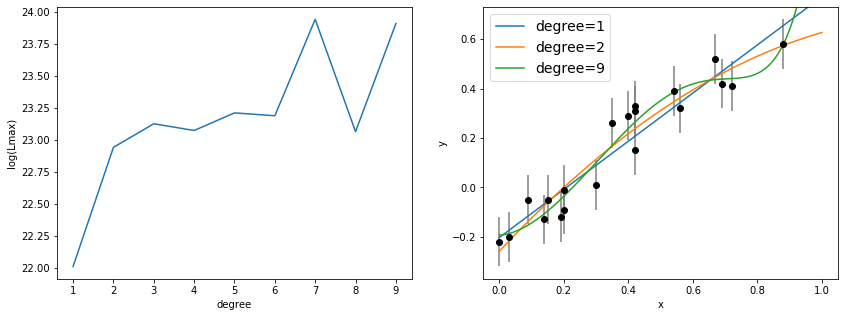

In [29]:
degrees = np.arange(1, 10)
thetas = [best_theta(d) for d in degrees]
logL_max = [logL(theta) for theta in thetas]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(degrees, logL_max)
ax[0].set(xlabel='degree', ylabel='log(Lmax)')
ax[1].errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ylim = ax[1].get_ylim()
for (degree, theta) in zip(degrees, thetas):
    if degree not in [1, 2, 9]: continue
    ax[1].plot(xfit, polynomial_fit(theta, xfit),
               label='degree={0}'.format(degree))
ax[1].set(ylim=ylim, xlabel='x', ylabel='y')
ax[1].legend(fontsize=14, loc='best');

### Frequentist Approach

For this model, minimizing the chi-square is equivalent to maximazing the likelyhood. The errors are gaussian around the mean. We may then calculate the value of chi-squared for both model and from it the value of the chi-squared likelyhood with the proper degrees of freedom. 

In [30]:
def compute_chi2(degree, data=data):
    x, y, sigma_y = data
    theta = best_theta(degree, data=data)
    resid = (y - polynomial_fit(theta, x)) / sigma_y
    return np.sum(resid ** 2)

def compute_dof(degree, data=data):
    return data.shape[1] - (degree + 1)

def chi2_likelihood(degree, data=data):
    chi2 = compute_chi2(degree, data)
    dof = compute_dof(degree, data)
    return stats.chi2(dof).pdf(chi2)

print("chi2 likelihood")
print("- linear model:    ", chi2_likelihood(1))
print("- quadratic model: ", chi2_likelihood(2))

chi2 likelihood
- linear model:     0.04552444452297716
- quadratic model:  0.03625617516942021


This seems to favour the linear model. Let's envisage a statiscal test for this. The difference between the two chi-squared of the models also follows a chi-squared distribution witgh 1 degree of freedom. 

The null hypothesis is: the linear model is correct.

Is there sufficient evidence to justify the quadratic model? Or, may we REJECT the null hypothesis?

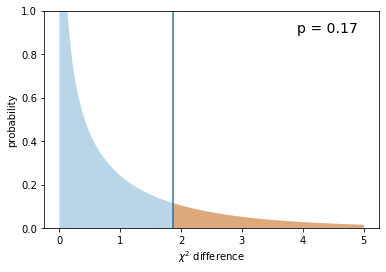

In [31]:
chi2_diff = compute_chi2(1) - compute_chi2(2)

v = np.linspace(0, 5, 1000)
chi2_dist = stats.chi2(1).pdf(v)
p_value = 1 - stats.chi2(1).cdf(chi2_diff)

fig, ax = plt.subplots()
ax.fill_between(v, 0, chi2_dist, alpha=0.3)
ax.fill_between(v, 0, chi2_dist * (v > chi2_diff), alpha=0.5)
ax.axvline(chi2_diff)
ax.set(ylim=(0, 1), xlabel="$\chi^2$ difference", ylabel="probability");
ax.text(4.9, 0.95, "p = {0:.2f}".format(p_value),
        ha='right', va='top', size=14);

We cannot reject the null hypothesis.

### Bayesian Approach

In [32]:
def log_prior(theta):
    # size of theta determines the model.
    # flat prior over a large range
    if np.any(abs(theta) > 100):
        return -np.inf  # log(0)
    else:
        return 200 ** -len(theta)

def log_likelihood(theta, data=data):
    x, y, sigma_y = data
    yM = polynomial_fit(theta, x)
    # We need to rewrite the likelyhood to speed up. scipy.stats.norm
    # is very slow in the emcee loop
    #return sum(stats.norm.logpdf(*args)
    #           for args in zip(y, yM, sigma_y))
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2)
                         + (y - yM) ** 2 / sigma_y ** 2)

    
def log_posterior(theta, data=data):
    theta = np.asarray(theta)
    return log_prior(theta) + log_likelihood(theta, data)

In [33]:
def compute_mcmc(degree, data=data,
                   log_posterior=log_posterior,
                   nwalkers=50, nburn=1000, nsteps=2000):
    ndim = degree + 1  # this determines the model
    rng = np.random.RandomState(0)
    starting_guesses = rng.randn(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
    sampler.run_mcmc(starting_guesses, nsteps)
    trace = sampler.chain[:, nburn:, :].reshape(-1, ndim)
    return trace

trace_2D = compute_mcmc(1)
trace_3D = compute_mcmc(2)

Removed no burn in


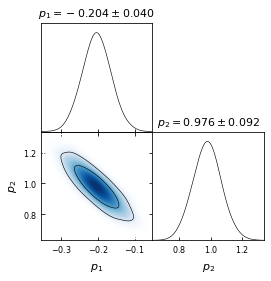

In [34]:
samples_2D = MCSamples(samples=trace_2D)
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize = 14
g.triangle_plot(samples_2D,
                shaded=True,
                title_limit=1, # first title limit (for 1D plots) is 68% by default
                markers={'alpha':27});

Removed no burn in


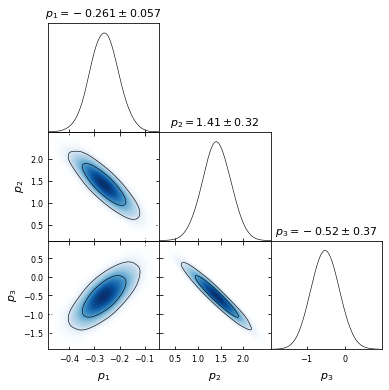

In [35]:
samples_3D = MCSamples(samples=trace_3D)
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize = 14
g.triangle_plot(samples_3D,
                shaded=True,
                title_limit=1, # first title limit (for 1D plots) is 68% by default
                markers={'alpha':27});

### Bayesian Model Selection: the Odds Ratio

The Bayesian approach proceeds very differently.
Recall that the Bayesian model involves computing the *odds ratio* between two models:

$$
O_{21} = \frac{P(M_2~|~D)}{P(M_1~|~D)} = \frac{P(D~|~M_2)}{P(D~|~M_1)}\frac{P(M_2)}{P(M_1)}
$$

Here the ratio $P(M_2) / P(M_1)$ is the *prior odds ratio*, and is often assumed to be equal to 1 if no compelling prior evidence favors one model over another.
The ratio $P(D~|~M_2) / P(D~|~M_1)$ is the *Bayes factor*, and is the key to Bayesian model selection.

The Bayes factor can be computed by evaluating the integral over the parameter likelihood:

$$
P(D~|~M) = \int_\Omega P(D~|~\theta, M) P(\theta~|~M) d\theta
$$

This integral is over the entire parameter space of the model, and thus can be extremely computationally intensive, especially as the dimension of the model grows beyond a few.
For the 2-dimensional and 3-dimensional models we are considering here, however, this integral can be computed directly via numerical integration.

We'll start, though, by using an MCMC to draw samples from the posterior in order to solve the *model fitting* problem.
We will use the [emcee](http://dan.iel.fm/emcee) package, which requires us to first define functions which compute the prior, likelihood, and posterior under each model:

In [36]:
from scipy import integrate

def integrate_posterior_2D(log_posterior, xlim, ylim, data=data):
    func = lambda theta1, theta0: np.exp(log_posterior([theta0, theta1], data))
    return integrate.dblquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1])

def integrate_posterior_3D(log_posterior, xlim, ylim, zlim, data=data):
    func = lambda theta2, theta1, theta0: np.exp(log_posterior([theta0, theta1, theta2], data))
    return integrate.tplquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1],
                             lambda x, y: zlim[0], lambda x, y: zlim[1])

In [37]:
xlim, ylim = zip(trace_2D.min(0), trace_2D.max(0))
%time Z1, err_Z1 = integrate_posterior_2D(log_posterior, xlim, ylim)
print("Z1 =", Z1, "+/-", err_Z1)

CPU times: user 691 ms, sys: 0 ns, total: 691 ms
Wall time: 692 ms
Z1 = 46938459.33024733 +/- 5.627113360229373


In [38]:
xlim, ylim, zlim = zip(trace_3D.min(0), trace_3D.max(0))
%time Z2, err_Z2 = integrate_posterior_3D(log_posterior, xlim, ylim, zlim)
print("Z2 =", Z2, "+/-", err_Z2)

CPU times: user 2min 31s, sys: 38.2 ms, total: 2min 31s
Wall time: 2min 31s
Z2 = 111119220.76820722 +/- 20.941019964870065


In [39]:
print("Bayes factor:", Z2 / Z1)
print('Bayesian "p-value":', Z1 / (Z1 + Z2))

Bayes factor: 2.36733847582001
Bayesian "p-value": 0.2969704433280891
